In [1]:
pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo
import pandas as pd

# fetch dataset
seoul_bike_sharing_demand = fetch_ucirepo(id=560)

# data (as pandas dataframes)
X = seoul_bike_sharing_demand.data.features
y = seoul_bike_sharing_demand.data.targets

bike_df = pd.concat([X, y], axis=1)

# Display the first 10 rows of the combined DataFrame
bike_df.head(10)

,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day
0,1/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
1,1/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
2,1/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,Winter,No Holiday,Yes
3,1/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
4,1/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,Winter,No Holiday,Yes
5,1/12/2017,100,5,-6.4,37,1.5,2000,-18.7,0.00,0.0,0.0,Winter,No Holiday,Yes
6,1/12/2017,181,6,-6.6,35,1.3,2000,-19.5,0.00,0.0,0.0,Winter,No Holiday,Yes
7,1/12/2017,460,7,-7.4,38,0.9,2000,-19.3,0.00,0.0,0.0,Winter,No Holiday,Yes
8,1/12/2017,930,8,-7.6,37,1.1,2000,-19.8,0.01,0.0,0.0,Winter,No Holiday,Yes
9,1/12/2017,490,9,-6.5,27,0.5,1928,-22.4,0.23,0.0,0.0,Winter,No Holiday,Yes


In [3]:
#check the data types of the variables
bike_df.dtypes

Date                      object
Rented Bike Count          int64
Hour                       int64
Temperature              float64
Humidity                   int64
Wind speed               float64
Visibility                 int64
Dew point temperature    float64
Solar Radiation          float64
Rainfall                 float64
Snowfall                 float64
Seasons                   object
Holiday                   object
Functioning Day           object
dtype: object

In [4]:
#check if there are missing values in the datset
bike_df.isnull().sum()

Date                     0
Rented Bike Count        0
Hour                     0
Temperature              0
Humidity                 0
Wind speed               0
Visibility               0
Dew point temperature    0
Solar Radiation          0
Rainfall                 0
Snowfall                 0
Seasons                  0
Holiday                  0
Functioning Day          0
dtype: int64

In [5]:
#check if there are duplicated data
bike_df.duplicated().sum()

0

In [6]:
#show the basic statistics description
bike_df.describe(include='all')

,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760
unique,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2
top,1/12/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,No Holiday,Yes
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,8465
mean,NaN,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,NaN
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN,NaN
min,NaN,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,NaN,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,NaN,NaN,NaN
75%,NaN,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,NaN,NaN,NaN


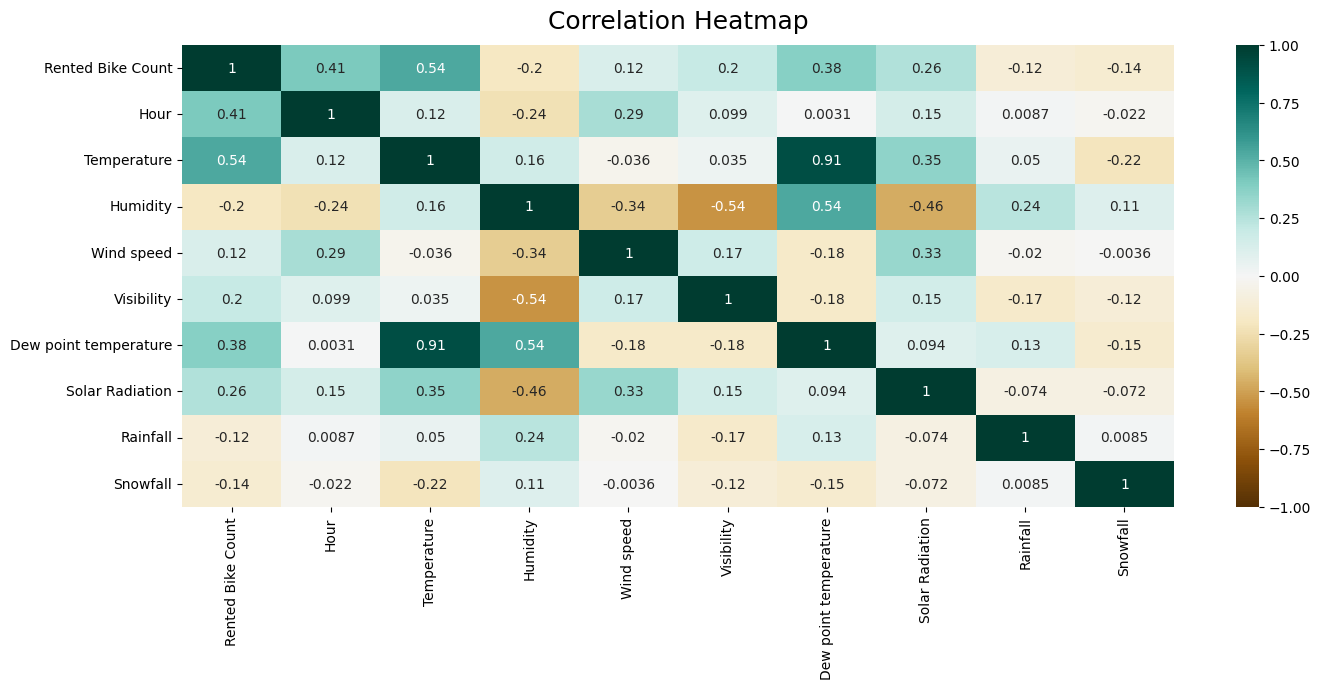

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Filter only numeric columns
numeric_bike_df = bike_df.select_dtypes(include=[np.number])

plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(numeric_bike_df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
# save heatmap as .png file
# dpi - sets the resolution of the saved image in dots/inches
# bbox_inches - when set to 'tight' - does not allow the labels to be cropped
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

plt.show()

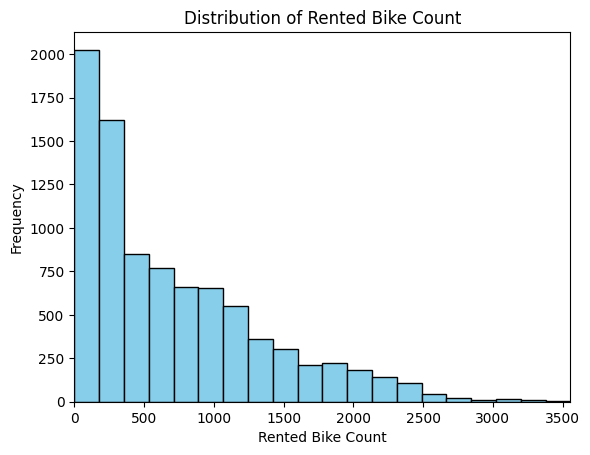

In [8]:
# Create a histogram for the 'Rented Bike Count' column
plt.hist(bike_df['Rented Bike Count'], bins=20, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Rented Bike Count')
plt.ylabel('Frequency')
plt.title('Distribution of Rented Bike Count')

# Adjust x-axis range
plt.xlim(0, bike_df['Rented Bike Count'].max())

# Show the plot
plt.show()

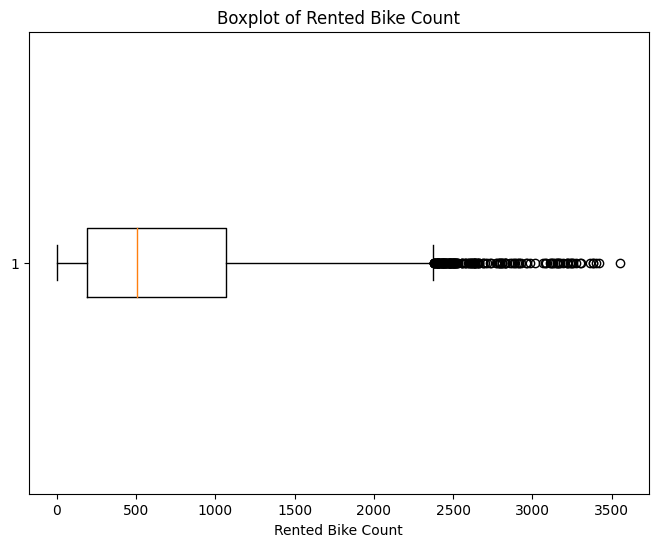

In [9]:
import matplotlib.pyplot as plt
# Create a boxplot for the 'Rented Bike Count' to find out the outliers
plt.figure(figsize=(8, 6))
plt.boxplot(bike_df['Rented Bike Count'], vert=False)
# Add labels and title
plt.xlabel('Rented Bike Count')
plt.title('Boxplot of Rented Bike Count')
# Show the plot
plt.show()


In [10]:
import numpy as np

# calculate the upper bound/ outer upper fence of rented bike count

# Calculate the lower quartile
Q1 = np.percentile(bike_df['Rented Bike Count'], 25)
# Calculate the upper quartile
Q3 = np.percentile(bike_df['Rented Bike Count'], 75)

IQR = Q3 - Q1

# Calculate the upper bound
upper_bound = Q3 + 1.5 * IQR

print("Upper Bound for Outliers:", upper_bound)

Upper Bound for Outliers: 2376.625


<ipython-input-11-157922ec1721>:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = plt.scatter(bike_df['Temperature'], bike_df["Rented Bike Count"], c=colors, cmap='coolwarm')


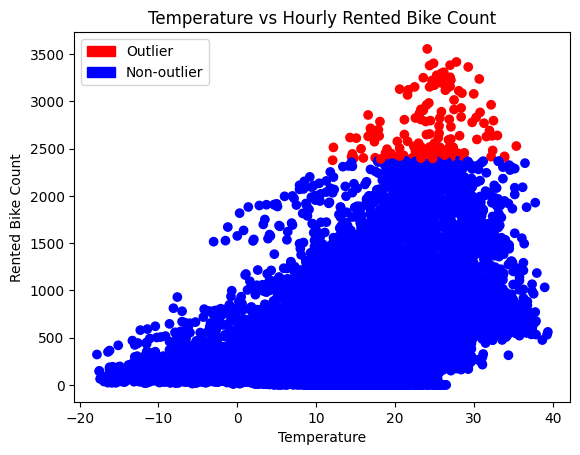

In [11]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

#the instances are outliers if rented bike counts are more than 2376.625
condition = bike_df["Rented Bike Count"] > 2376.625
#red represents outliers and blue represents non-outliers
colors = np.where(condition, 'red', 'blue')

# Plot the scatter plot with different colors based on the condition
scatter = plt.scatter(bike_df['Temperature'], bike_df["Rented Bike Count"], c=colors, cmap='coolwarm')
plt.xlabel('Temperature')
plt.ylabel('Rented Bike Count')
plt.title('Temperature vs Hourly Rented Bike Count')
# Create a custom legend
red_patch = mpatches.Patch(color='red', label='Outlier')
blue_patch = mpatches.Patch(color='blue', label='Non-outlier')
plt.legend(handles=[red_patch, blue_patch])

plt.show()

<ipython-input-12-52629929671e>:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = plt.scatter(bike_df['Hour'], bike_df["Rented Bike Count"], c=colors, cmap='coolwarm')


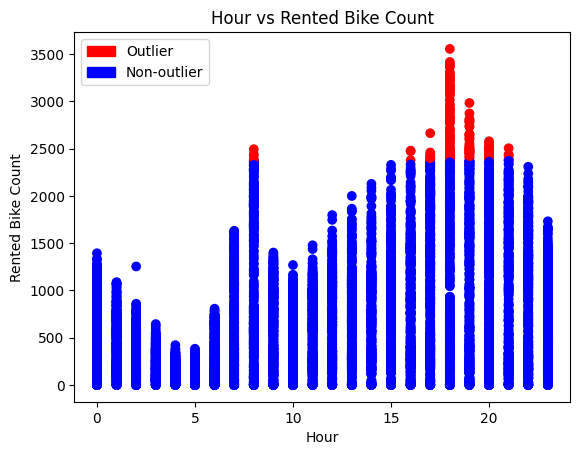

In [12]:
#the instances are outliers if rented bike counts are more than 2376.625
condition = bike_df["Rented Bike Count"] > 2376.625
#red represents outliers and blue represents non-outliers
colors = np.where(condition, 'red', 'blue')

# Plot the scatter plot with different colors based on the condition
scatter = plt.scatter(bike_df['Hour'], bike_df["Rented Bike Count"], c=colors, cmap='coolwarm')
plt.xlabel('Hour')
plt.ylabel('Rented Bike Count')
plt.title('Hour vs Rented Bike Count')

# Create a custom legend
red_patch = mpatches.Patch(color='red', label='Outlier')
blue_patch = mpatches.Patch(color='blue', label='Non-outlier')
plt.legend(handles=[red_patch, blue_patch])

plt.show()

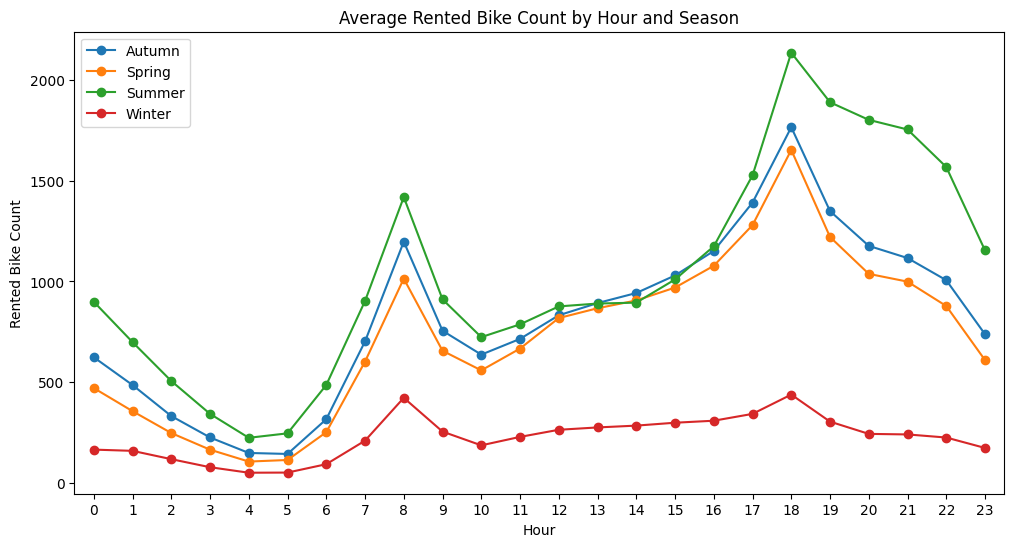

In [13]:
plt.figure(figsize=(12, 6))

# Group the data by 'Hour', 'Seasons', and calculate the mean 'Rented Bike Count' for each hour and season
hourly_season_counts = bike_df.groupby(['Hour', 'Seasons'])['Rented Bike Count'].mean().unstack()

# Plot a line plot for each season
for season in hourly_season_counts.columns:
    plt.plot(hourly_season_counts.index, hourly_season_counts[season], marker='o', label=season)

plt.xlabel('Hour')
plt.ylabel('Rented Bike Count')
plt.title('Average Rented Bike Count by Hour and Season')
plt.legend()
plt.xlim(-0.5, 23.5)
# make x-axis ticks to show all 24 hours
plt.xticks(range(24))

plt.show()

<ipython-input-14-5a7730f1ae0b>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=bike_df, x='Rented Bike Count', y='Holiday', inner='box', palette='Dark2',


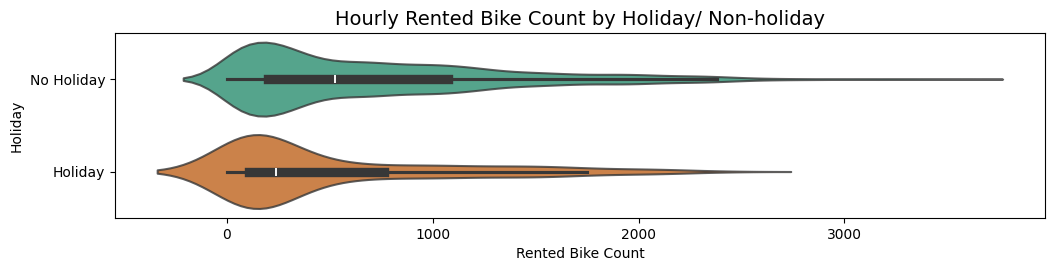

In [14]:
figsize_season_count = (12, 1.2 * len(bike_df['Holiday'].unique()))

# Create a figure and axis
fig, ax = plt.subplots(figsize=figsize_season_count)

# Plot violin plot with boxplot inside
sns.violinplot(data=bike_df, x='Rented Bike Count', y='Holiday', inner='box', palette='Dark2',
               linewidth=1.5, width=0.8, alpha=0.8, ax=ax)

# Set title
ax.set_title('Hourly Rented Bike Count by Holiday/ Non-holiday', fontsize=14)

# Show the plot
plt.show()

In [16]:
# Convert the column 'Date' in bike_df into a datetime format '%d/%m/%Y'
bike_df['Date'] = pd.to_datetime(bike_df['Date'], format='%d/%m/%Y')

# Separate Day, Month, and Year from 'Date'
bike_df['Day'] = bike_df['Date'].dt.day
bike_df['Month'] = bike_df['Date'].dt.month
bike_df['Year'] = bike_df['Date'].dt.year

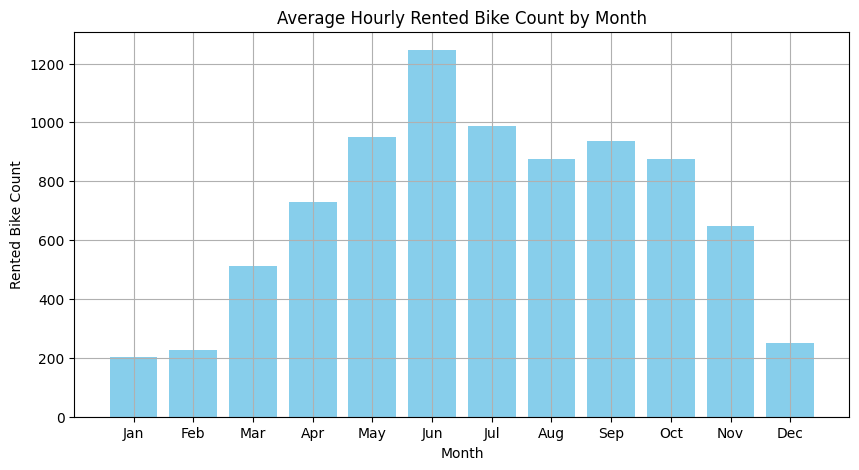

In [17]:
# Group by month and calculate mean rented bike count
bike_Monthly_count = bike_df.groupby('Month')['Rented Bike Count'].mean().reset_index()

# Create a bar chart
plt.figure(figsize=(10, 5))
plt.bar(bike_Monthly_count['Month'], bike_Monthly_count['Rented Bike Count'], color='skyblue')

plt.xlabel('Month')
plt.ylabel('Rented Bike Count')
plt.title('Average Hourly Rented Bike Count by Month')
plt.grid(True)
plt.xticks(bike_Monthly_count['Month'], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.show()